# Q-7. 
```
Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model, built-in docker, and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.
```

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [145]:
df = pd.read_csv("data.csv")

In [146]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [147]:
df.shape

(1000, 30)

In [148]:
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [150]:
numerical = df.select_dtypes(exclude="object").columns

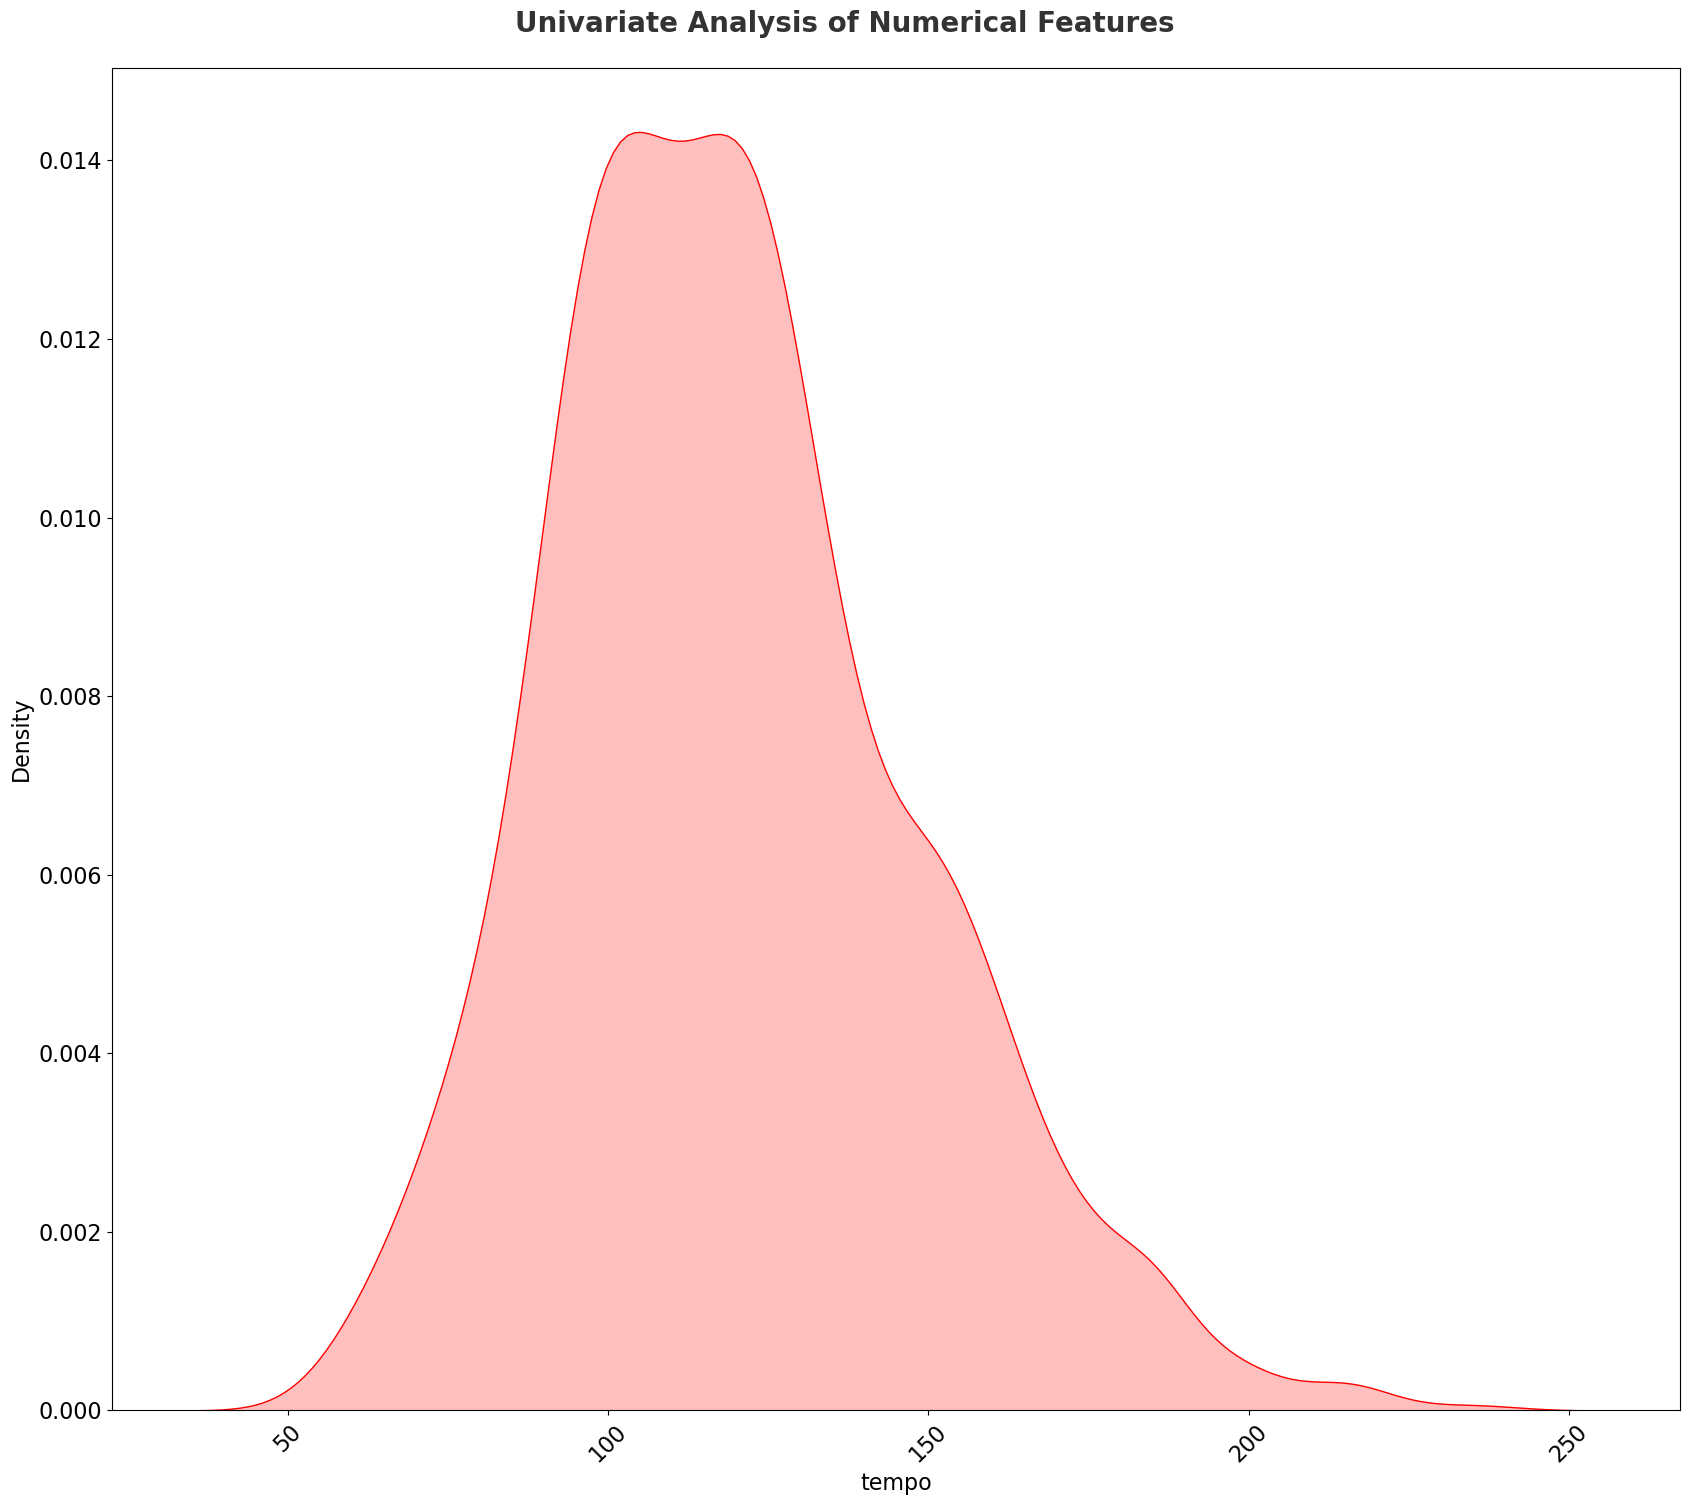

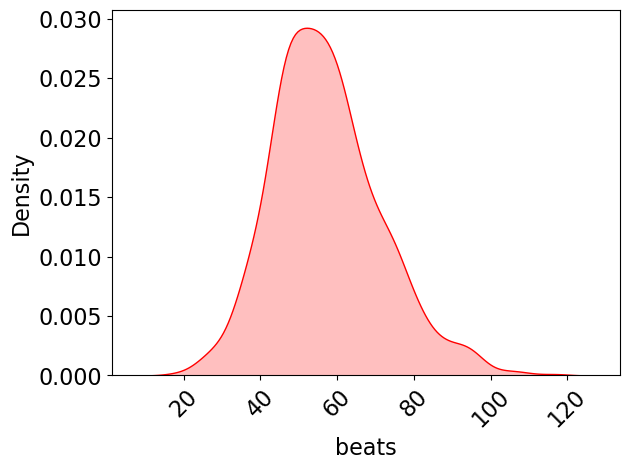

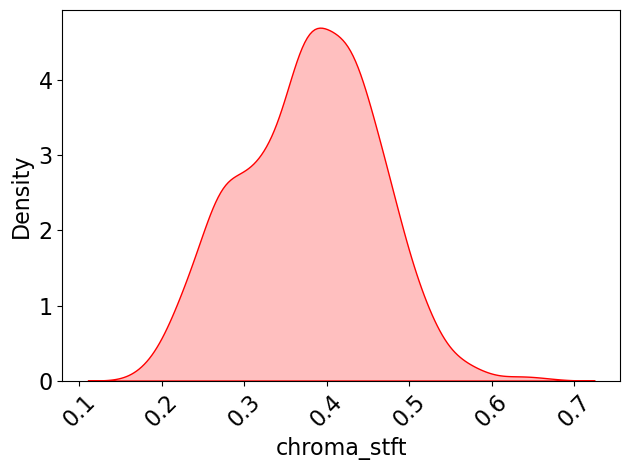

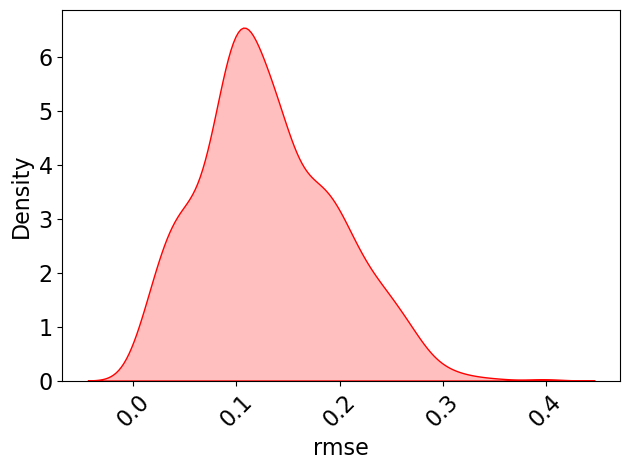

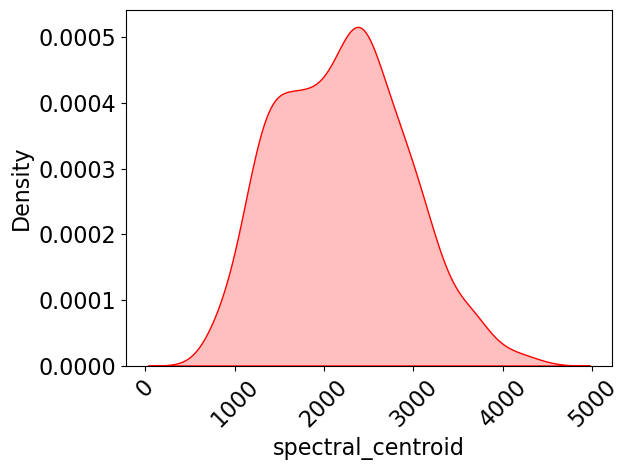

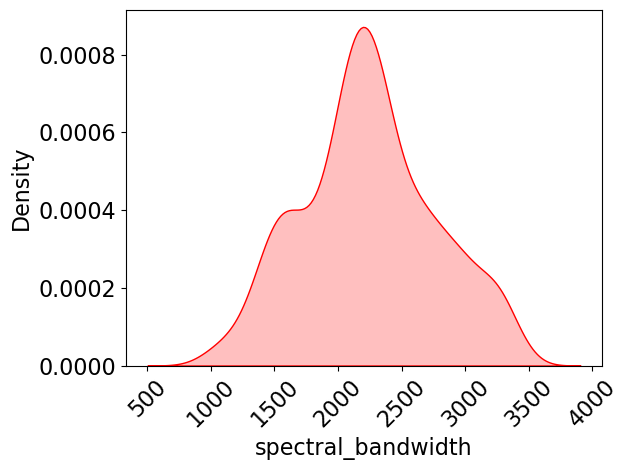

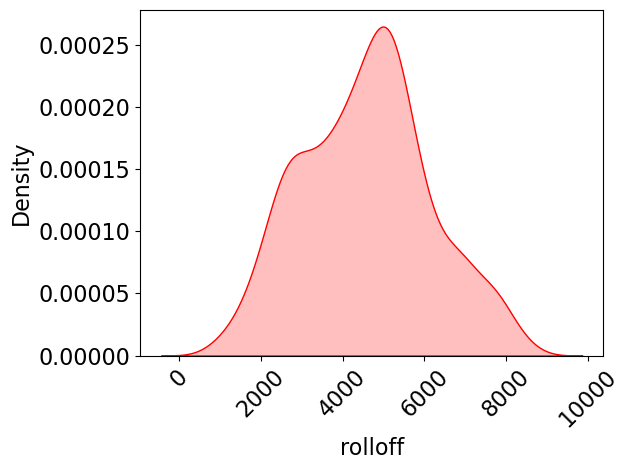

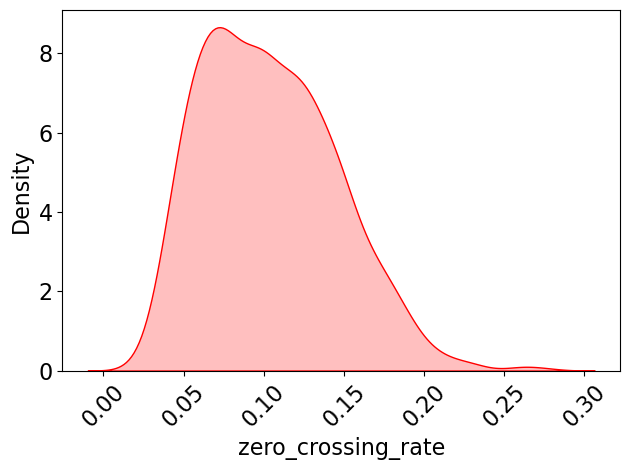

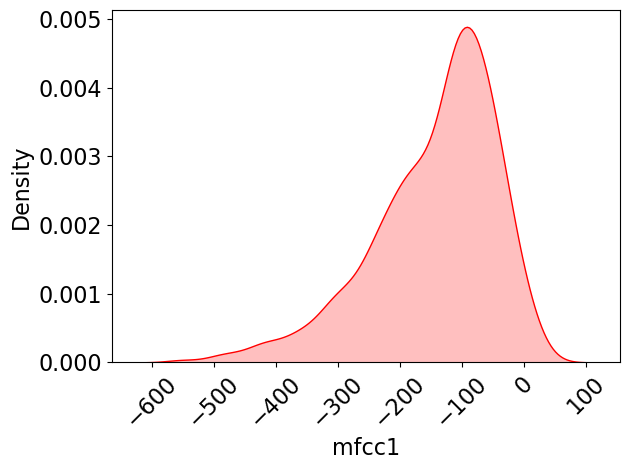

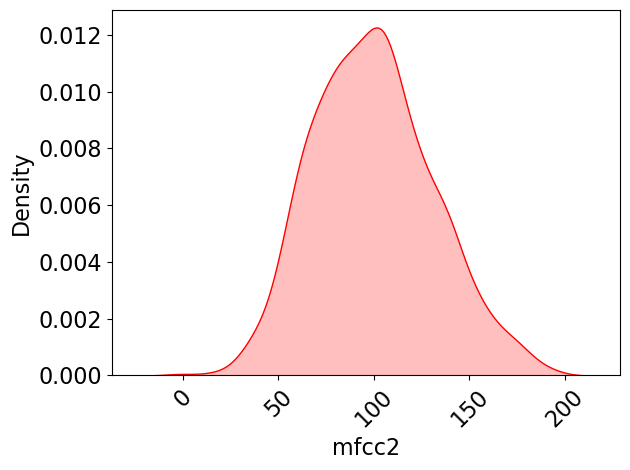

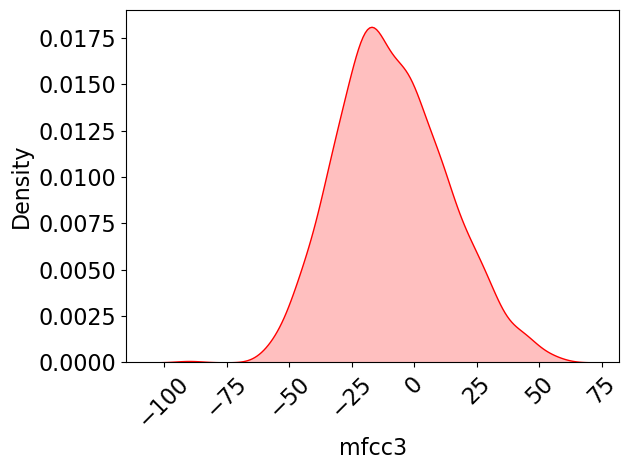

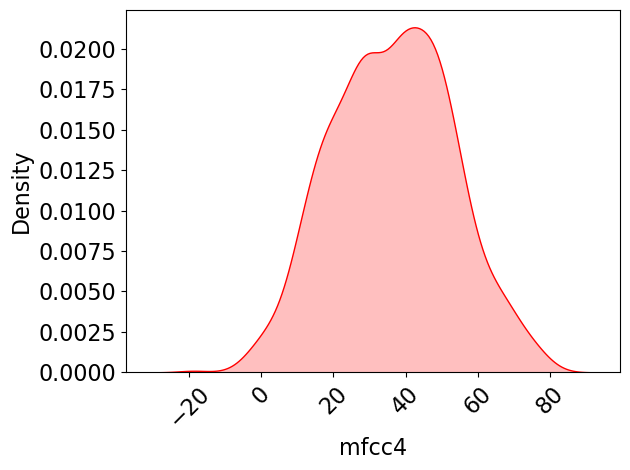

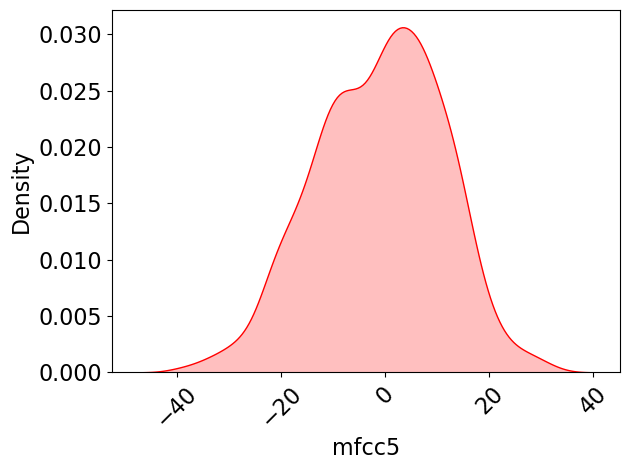

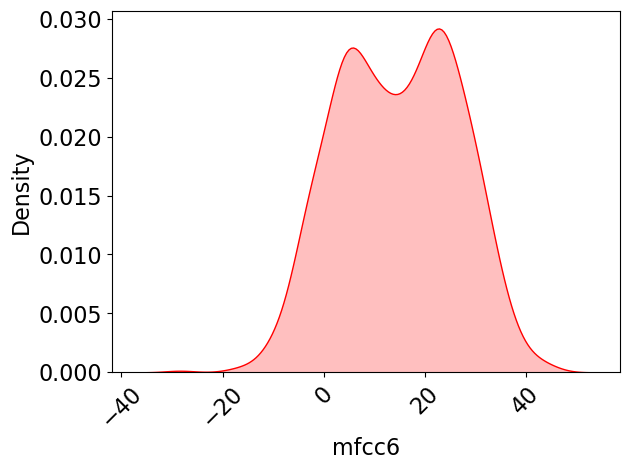

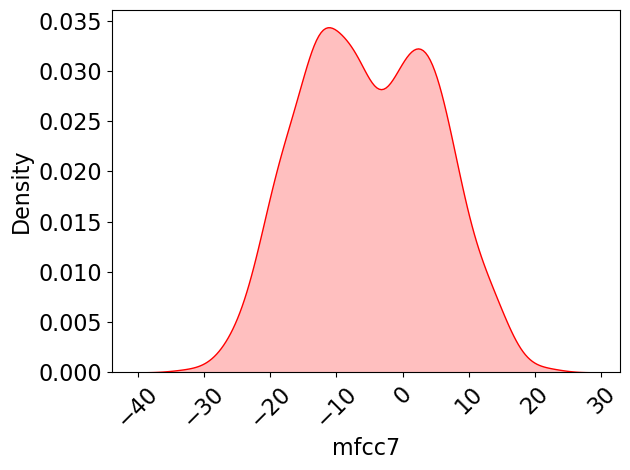

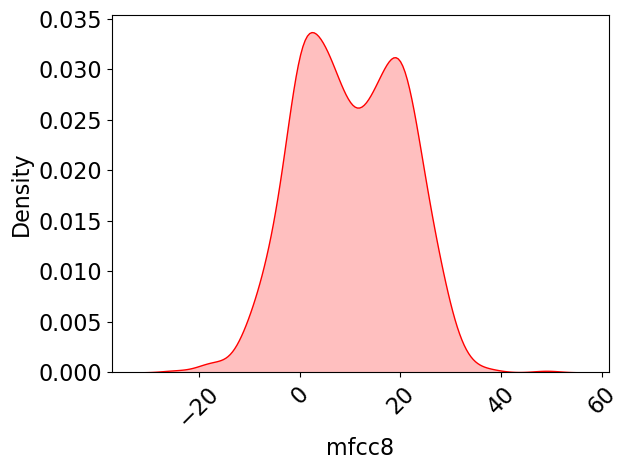

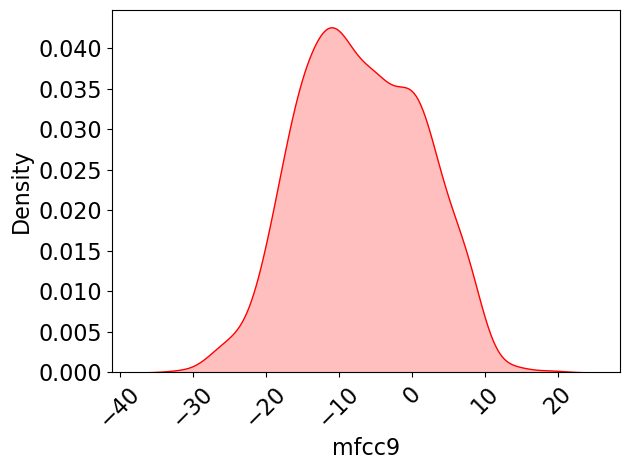

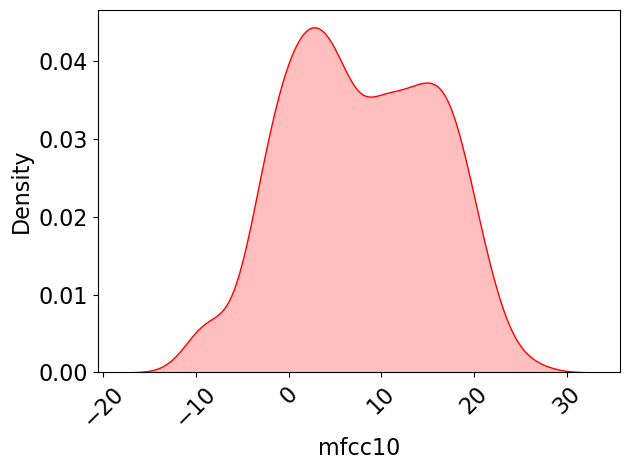

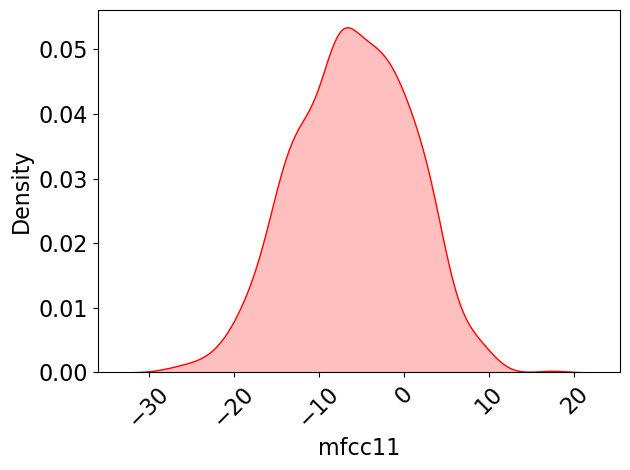

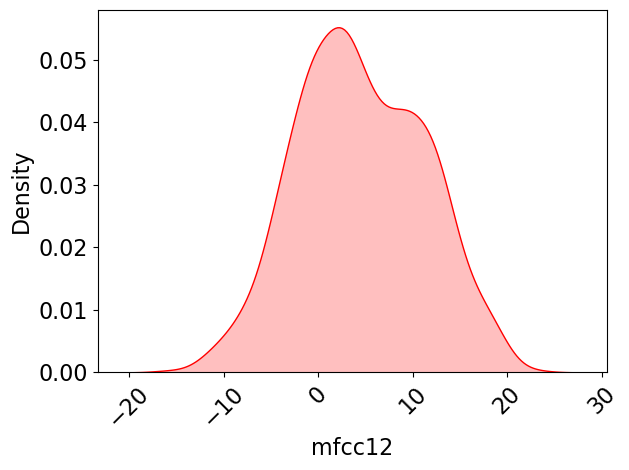

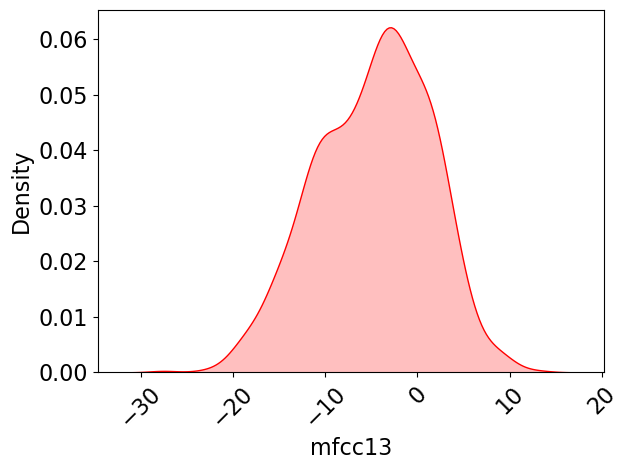

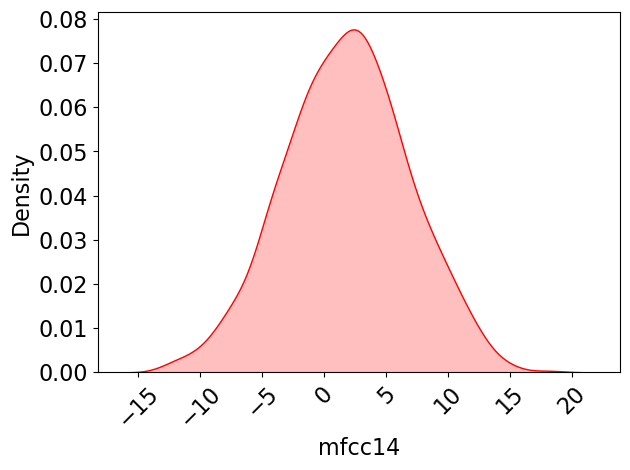

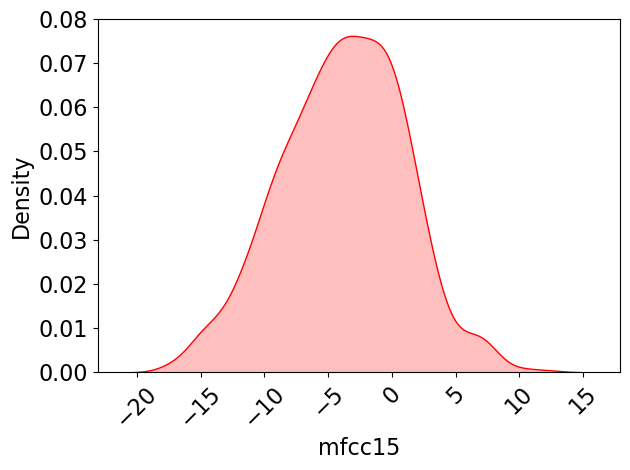

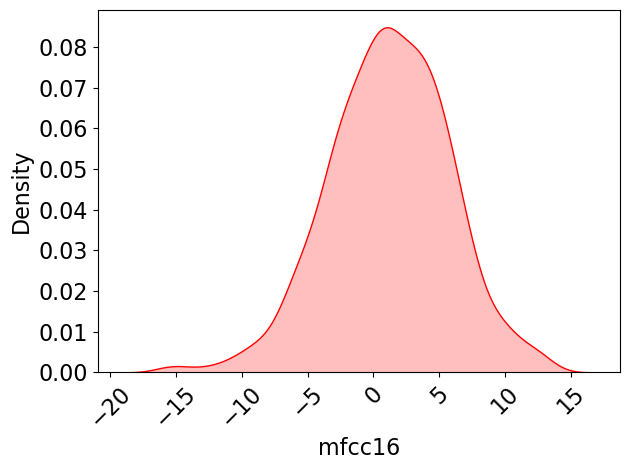

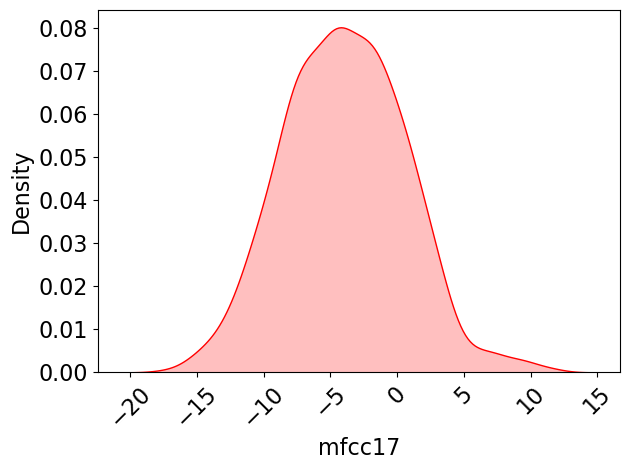

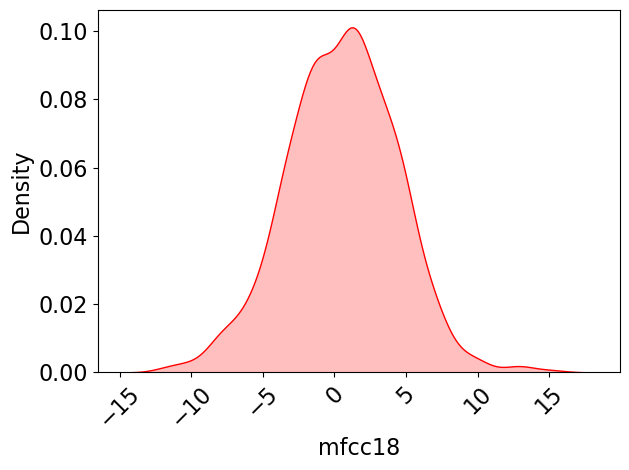

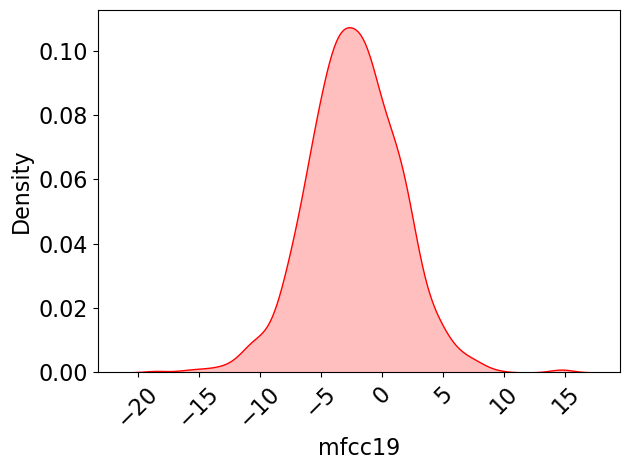

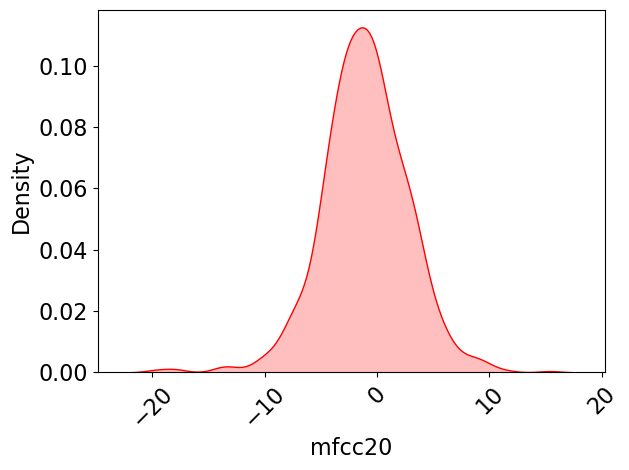

In [151]:
plt.figure(figsize=(17, 15))
plt.suptitle('Univariate Analysis of Numerical Features', 
             fontsize=20, 
             fontweight='bold', 
             alpha=0.8, 
             y=1.)

for i in range(0, len(numerical)):
    ax = sns.kdeplot(df[numerical[i]], fill=True, color='r')
    plt.xlabel(numerical[i], fontsize=16)
    plt.xticks(rotation=45, fontsize=16)
    ax.set_ylabel('Density', fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

In [152]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [153]:
df = df.sample(frac=1, random_state=42)

In [154]:
X = df.drop(["filename", "label", "rmse", "rolloff"], axis=1)
y = df["label"]

In [155]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [156]:
categories = ['pop','classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'blues', 'reggae', 'rock']

In [157]:
encoder = OrdinalEncoder(categories=[categories])
y = encoder.fit_transform(pd.DataFrame(y))

In [158]:
y = y.reshape(1, -1)
y = y.tolist()[0]

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [161]:
wcss=[]
for k in range(2,15):
    kmean=KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

k = KneeLocator(range(2,15), wcss, curve='convex', direction='decreasing')
optimal_clusters = k.elbow

print(f"Optimal_Clusters: {optimal_clusters}")

Optimal_Clusters: 4


In [162]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Create and fit GMM model
gmm = GaussianMixture(n_components=optimal_clusters, 
                      random_state=42, 
                      covariance_type="full", 
                      init_params="random_from_data")
gmm.fit(X)

# Get cluster labels
labels = gmm.predict(X)

# Print cluster labels for each sample
print(labels)

[2 2 2 0 2 0 0 2 2 3 2 3 0 0 2 1 1 2 2 2 1 3 0 3 1 3 3 1 0 1 0 3 0 0 0 3 0
 2 0 1 2 1 0 2 1 1 1 0 0 1 3 2 1 1 0 1 0 3 2 1 1 0 0 3 0 0 0 2 1 3 3 2 3 2
 1 1 0 3 1 0 0 3 1 1 2 2 3 1 2 1 0 0 3 1 1 2 2 3 1 2 2 2 0 1 0 0 2 2 3 0 1
 2 2 2 0 2 3 0 2 0 0 2 2 1 1 2 0 1 3 1 0 1 0 0 0 3 0 1 0 3 0 1 2 1 3 2 1 0
 1 2 0 3 0 1 2 0 1 0 0 1 1 2 0 0 1 0 2 0 2 2 0 0 3 0 2 0 2 0 2 0 0 1 2 1 1
 3 2 2 1 2 0 1 0 3 2 1 0 2 0 1 1 3 0 3 0 3 3 1 2 2 3 3 1 1 0 0 0 1 0 2 2 2
 0 1 2 1 1 2 1 1 2 0 1 1 0 1 1 2 3 0 3 1 1 2 2 0 2 0 1 1 1 2 2 3 0 2 3 0 0
 0 2 2 0 1 2 2 1 0 0 0 2 3 0 1 2 3 3 0 0 2 1 1 0 3 1 2 2 2 3 2 0 2 3 0 0 1
 0 2 0 3 1 0 2 0 2 0 2 0 0 3 2 2 0 2 0 0 2 0 2 1 0 3 2 0 2 2 0 2 2 3 2 0 2
 0 0 2 1 1 1 2 0 2 2 3 0 2 3 2 3 0 3 1 1 3 1 3 0 2 2 3 2 3 3 0 3 0 2 3 0 2
 3 2 3 3 0 2 2 3 1 2 1 3 2 0 1 2 3 3 2 2 3 0 0 3 3 3 0 2 2 1 1 1 3 2 0 0 3
 0 3 2 0 0 2 1 2 2 0 0 1 0 3 2 2 2 0 0 0 0 0 2 0 0 0 2 1 1 3 0 2 0 2 3 2 0
 3 3 0 3 0 0 0 1 1 3 1 0 1 0 0 2 1 3 3 1 0 3 3 2 2 1 2 3 2 1 0 1 0 2 0 3 0
 1 3 0 0 3 3 2 3 2 1 3 2 

In [163]:
from sklearn.metrics import rand_score, adjusted_rand_score

In [164]:
adjusted_rand_score(y, labels)

0.15512510781562994

### Test Data

In [165]:
test_df = pd.read_csv("data_2genre.csv")

In [166]:
test_df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,classical.00020.au,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,...,-1.808325,-4.104602,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2
196,classical.00072.au,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,...,4.684600,3.343187,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2
197,classical.00061.au,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,...,-4.592368,-1.540610,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2
198,classical.00008.au,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2


In [167]:
X = test_df.drop(["filename", "label", "rmse", "rolloff"], axis=1)

In [168]:
y = test_df["label"]

In [169]:
y_pred = gmm.predict(X)

In [170]:
adjusted_rand_score(y_pred, y)

0.821280038895344